In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [116]:
df=pd.read_csv(os.path.join('datasets','AirlineTweets.csv'))

In [117]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [119]:
df=df[['text','airline_sentiment']]

In [120]:
df.shape

(14640, 2)

In [121]:
df[df.text=='NaN'],df[df.airline_sentiment=='NaN'] 

(Empty DataFrame
 Columns: [text, airline_sentiment]
 Index: [],
 Empty DataFrame
 Columns: [text, airline_sentiment]
 Index: [])

In [122]:
text=df.text.values

In [123]:
text

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [124]:
s=text[0].split(' ')
s

['@VirginAmerica', 'What', '@dhepburn', 'said.']

In [125]:
s=s[1:]
s

['What', '@dhepburn', 'said.']

In [126]:
s=' '.join(s)
s

'What @dhepburn said.'

In [128]:
df['airline_sentiment']=df['airline_sentiment'].map({'positive':1,'neutral':0,'negative':2})

C:\Users\dellb\AppData\Local\Temp\ipykernel_12720\1269910487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment']=df['airline_sentiment'].map({'positive':1,'neutral':0,'negative':2})


In [129]:
df

text  airline_sentiment
0                    @VirginAmerica What @dhepburn said.                  0
1      @VirginAmerica plus you've added commercials t...                  1
2      @VirginAmerica I didn't today... Must mean I n...                  0
3      @VirginAmerica it's really aggressive to blast...                  2
4      @VirginAmerica and it's a really big bad thing...                  2
...                                                  ...                ...
14635  @AmericanAir thank you we got on a different f...                  1
14636  @AmericanAir leaving over 20 minutes Late Flig...                  2
14637  @AmericanAir Please bring American Airlines to...                  0
14638  @AmericanAir you have my money, you change my ...                  2
14639  @AmericanAir we have 8 ppl so we need 2 know h...                  0

[14640 rows x 2 columns]

In [196]:
df['airline_sentiment']

0        0
1        1
2        0
3        2
4        2
        ..
14635    1
14636    2
14637    0
14638    2
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

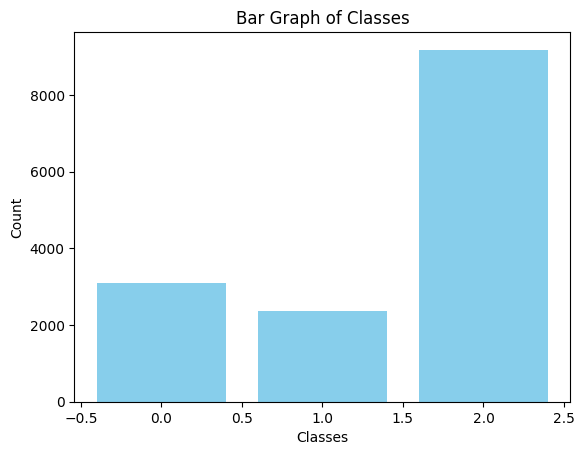

In [197]:
class_counts = df['airline_sentiment'].value_counts()
plt.bar(class_counts.index, class_counts.values, color='skyblue')

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Bar Graph of Classes')

# Show the plot
plt.show()


In [130]:
from tensorflow.keras.utils import to_categorical

In [131]:
labels=to_categorical(df['airline_sentiment'],num_classes=3)

In [132]:
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [133]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [134]:
MAX_FEATURES=200000
tokenizer=Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(text)

In [135]:
sequences=tokenizer.texts_to_sequences(text)

In [136]:
sequences

[[81, 62, 6686, 226],
 [81, 558, 590, 1159, 2536, 1, 2, 201, 6687],
 [81, 3, 207, 102, 805, 591, 3, 76, 1, 156, 150, 193],
 [81,
  89,
  136,
  3792,
  1,
  4706,
  4707,
  1009,
  15,
  21,
  6688,
  3793,
  59,
  57,
  22,
  503,
  2798],
 [81, 10, 89, 4, 136, 476, 214, 487, 84, 20],
 [81,
  439,
  77,
  287,
  221,
  4,
  8,
  7,
  199,
  27,
  207,
  22,
  29,
  2114,
  89,
  136,
  2,
  118,
  214,
  487,
  84,
  130,
  1850],
 [81, 171, 1483, 315, 51, 3, 108, 2294, 29, 6689, 6690, 2295, 133, 462],
 [81,
  136,
  288,
  4,
  3197,
  1759,
  7,
  3794,
  338,
  3795,
  6691,
  73,
  576,
  32,
  33,
  6692],
 [81, 236, 3, 6693, 42, 3, 46, 1123],
 [81, 20, 23, 364, 10, 577, 43, 91, 358, 238, 175, 140, 1, 19],
 [81,
  122,
  6,
  112,
  27,
  2537,
  14,
  2,
  618,
  2115,
  785,
  18,
  1484,
  1760,
  2538,
  211,
  425],
 [81, 3, 743, 101, 698, 6694, 47, 180, 220, 166, 6695, 6696, 1123],
 [81,
  29,
  14,
  578,
  4,
  119,
  656,
  222,
  1485,
  84,
  11,
  638,
  193,
  1,
  1

In [137]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [138]:
len(sequences)

14640

In [139]:
word2idx=tokenizer.word_index
vocab_size=len(word2idx)

In [140]:
padded_seq=pad_sequences(sequences,padding='post')

In [141]:
padded_seq

array([[  81,   62, 6686, ...,    0,    0,    0],
       [  81,  558,  590, ...,    0,    0,    0],
       [  81,    3,  207, ...,    0,    0,    0],
       ...,
       [  13,   75,  661, ...,    0,    0,    0],
       [  13,    6,   22, ...,    0,    0,    0],
       [  13,   41,   22, ...,    0,    0,    0]])

In [142]:
sequences_ragged=tf.ragged.constant(sequences)

In [143]:
sequences_ragged

<tf.RaggedTensor [[81, 62, 6686, 226], [81, 558, 590, 1159, 2536, 1, 2, 201, 6687],
 [81, 3, 207, 102, 805, 591, 3, 76, 1, 156, 150, 193], ...,
 [13, 75, 661, 456, 256, 1, 15768],
 [13, 6, 22, 11, 373, 6, 129, 11, 8, 10, 95, 341, 21, 910, 97, 197, 1476,
  47, 3, 37, 131, 11, 2696]                                              ,
 [13, 41, 22, 305, 867, 47, 41, 76, 48, 112, 65, 345, 199, 38, 9, 2, 179, 8,
  939, 277, 61, 9, 622, 7, 114, 145, 9, 2, 179, 8]                          ]>

In [144]:
from tensorflow.keras.layers import TextVectorization

In [145]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')

In [146]:
vectorizer.adapt(text)

In [147]:
vectorized_text=vectorizer(text)

In [148]:
vocab_size_vectorized=len(vectorizer.get_vocabulary())

In [149]:
#MCSHBAP
dataset=tf.data.Dataset.from_tensor_slices((sequences_ragged,labels))
dataset=dataset.cache()
dataset=dataset.shuffle(500)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [150]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Bidirectional,LSTM,Dropout

In [180]:
model=Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [181]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [182]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 32)          6400032   
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               16640     
 onal)                                                           
                                                                 
 dense_52 (Dense)            (None, 128)               8320      
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 256)               33024     
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                     

In [183]:
history=model.fit(train,epochs=10,validation_data=val)

Epoch 1/10
640/640 [==============================] - 91s 129ms/step - loss: 0.6917 - accuracy: 0.7026 - val_loss: 0.4824 - val_accuracy: 0.8204
Epoch 2/10
640/640 [==============================] - 90s 141ms/step - loss: 0.4205 - accuracy: 0.8388 - val_loss: 0.4819 - val_accuracy: 0.8204
Epoch 3/10
640/640 [==============================] - 79s 123ms/step - loss: 0.2470 - accuracy: 0.9138 - val_loss: 0.5410 - val_accuracy: 0.8197
Epoch 4/10
640/640 [==============================] - 70s 109ms/step - loss: 0.1464 - accuracy: 0.9532 - val_loss: 0.6271 - val_accuracy: 0.8125
Epoch 5/10
640/640 [==============================] - 72s 113ms/step - loss: 0.0926 - accuracy: 0.9707 - val_loss: 0.7988 - val_accuracy: 0.8029
Epoch 6/10
640/640 [==============================] - 70s 109ms/step - loss: 0.0705 - accuracy: 0.9797 - val_loss: 0.6298 - val_accuracy: 0.7927
Epoch 7/10
640/640 [==============================] - 72s 113ms/step - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.8807 - val_ac

In [184]:
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

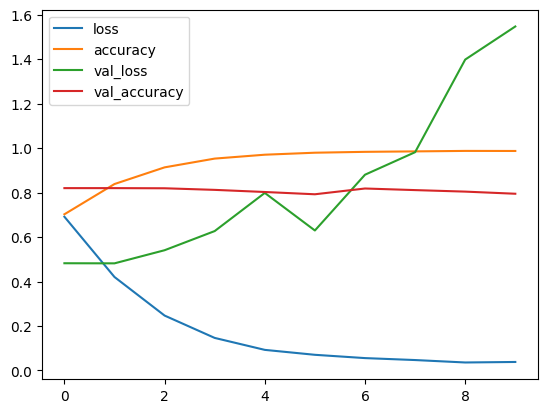

In [185]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [186]:
from tensorflow.keras.metrics import Recall,Precision,Accuracy

In [187]:
re=Recall()
pre=Precision()
acc=Accuracy()

In [188]:
for batch in iter(test):
    X_true,y_true=batch
    yhat=model.predict(X_true)
    yhat=(yhat>=0.5).astype(int)
    # yhat=yhat.flatten()
    y_true=y_true.numpy()
    # y_true=y_true.flatten()
    
    re.update_state(yhat,y_true)
    pre.update_state(yhat,y_true)
    acc.update_state(yhat,y_true)

1/1 [==============================] - 0s 21ms/step


In [189]:
print(f'Recall: {re.result().numpy()}, Precision: {pre.result().numpy()}, Accuracy: {acc.result().numpy()}')

Recall: 0.783390998840332, Precision: 0.7774725556373596, Accuracy: 0.8541666865348816


### model has bad validation loss because of class imbalance but still peroforms well on test data

In [190]:
y_true

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [191]:
yhat

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [198]:
model.save('saved_models/Sentiment.h5')